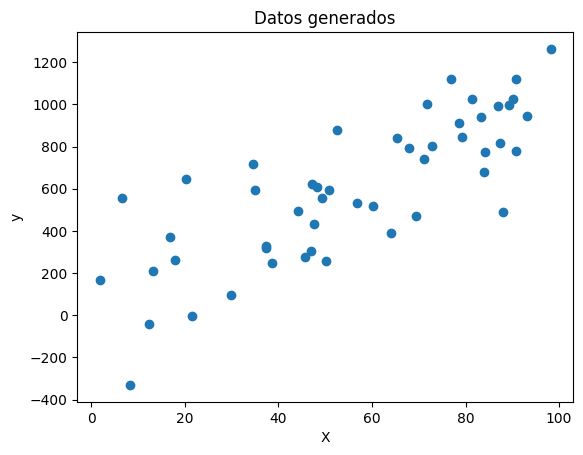

Pendiente (coef_): 10.29
Intercepto: 40.60
Ecuación: y = 40.60 + 10.29 * X
ECM (train): 43239.43
R² (train): 0.65
ECM (test): 37829.17
R² (test): 0.58


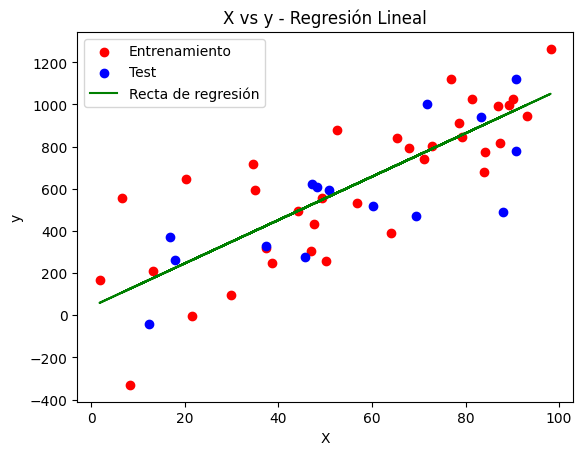

Predicción de y para X=50: 554.89


In [1]:

import numpy as np
import random
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 2. Definir la función generadora de datos
def generador_datos_simple(beta, muestras, desviacion):
    # Genera 'muestras' valores aleatorios de X entre 0 y 100
    X = np.random.random(muestras) * 100
    # Error aleatorio gaussiano (simula ruido típico)
    e = np.random.randn(muestras) * desviacion
    # Crea la relación lineal con ruido: y = X*beta + error
    y = X * beta + e
    return X.reshape(muestras, 1), y.reshape(muestras, 1)

# 3. Parámetros de la simulación
desviacion = 200
beta = 10
n = 50

# 4. Generar los datos artificiales
X, y = generador_datos_simple(beta, n, desviacion)

# 5. Representar los datos
plt.scatter(X, y)
plt.title("Datos generados")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

# 6. Dividir en entrenamiento (70%) y test (30%)
n_train = int(n * 0.7)
X_train, y_train = X[:n_train], y[:n_train]
X_test, y_test = X[n_train:], y[n_train:]

# 7. Crear el objeto modelo y entrenar
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

# 8. Predicciones sobre los conjuntos
y_pred = regr.predict(X_train)
y_pred_test = regr.predict(X_test)

# 9. Extraer e imprimir los parámetros del modelo
pendiente = regr.coef_[0][0]
intercepto = regr.intercept_[0]
print(f"Pendiente (coef_): {pendiente:.2f}")
print(f"Intercepto: {intercepto:.2f}")
print(f"Ecuación: y = {intercepto:.2f} + {pendiente:.2f} * X")

# 10. Métricas
print(f"ECM (train): {mean_squared_error(y_train, y_pred):.2f}")
print(f"R² (train): {r2_score(y_train, y_pred):.2f}")
print(f"ECM (test): {mean_squared_error(y_test, y_pred_test):.2f}")
print(f"R² (test): {r2_score(y_test, y_pred_test):.2f}")

# 11. Dibuja la regresión, train y test
plt.scatter(X_train, y_train, color="red", label="Entrenamiento")
plt.scatter(X_test, y_test, color="blue", label="Test")
plt.plot(X_train, y_pred, color="green", label="Recta de regresión")
plt.title("X vs y - Regresión Lineal")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# 12. Predicción ejemplo
X_nuevo = np.array([[50]])
y_pred_single = regr.predict(X_nuevo)
print(f"Predicción de y para X=50: {y_pred_single[0][0]:.2f}")
